# Analiza Sentiment leksikona -Jerteh 355




In [1]:

import pandas as pd

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:

RES_DIR = "..\\resources\\"
MOD_DIR = "..\\ml_models\\"


Odve se učitava leksikon. Svi leksikoni su snimljeni us dva falja. Falj sa _a ima i vrste reči radi analize. 

In [4]:
sent_an = pd.read_csv(RES_DIR + "srbsentiwordnet_a7.csv",  index_col=0)

In [5]:
sent_an["OBJ"] = 1-( sent_an["NEG"]+sent_an["POS"])

In [6]:
sent_an

,POS,NEG,Lemme,Definicija,Vrsta,OBJ
ID,,,,,,
ENG30-03574555-n,0.000264,0.000930,ustanova,zgrada u kojoj se nalazi organizaciona jedinica neke grane javnog poslovanja,n,0.998806
ENG30-07810907-n,0.000730,0.000376,začin,pripremljeni dodatak jelu za poboljšanje ukusa,n,0.998895
ENG30-00721431-n,0.026438,0.016398,mesto,"u nečijim prilikama, mogućnostima",n,0.957165
ENG30-00473799-v,0.002790,0.008897,"obnoviti,doterati,uglancati,uljuditi",Ostalo je još samo da se doteraju neke finese u igri plavih.,v,0.988312
ENG30-00903385-v,0.038394,0.030437,oprostiti,Zapad mu je oprostio što se nekada računao u Slobine prijatelje.,v,0.931170
...,...,...,...,...,...,...
ENG30-15266265-n,0.000266,0.000480,mandat,mandat predsednika,n,0.999253
ENG30-15266685-n,0.001026,0.000793,sredina,vreme između početka i kraja vremenskog perioda,n,0.998180
ENG30-15266911-n,0.000430,0.000503,"gotovo,konac,kraj,prestanak,svršetak,završetak",tačka u vremenu kada se nešto završava,n,0.999068


In [7]:
pd.set_option('display.max_rows', None)

## Statistike

In [8]:
# Define bin edges
bin_edges = [i/8 for i in range(9)]
bin_labels = [f"[{bin_edges[i]}, {bin_edges[i+1]})" for i in range(len(bin_edges)-1)]

# Function to bin data and get both count and percentage for each bin
def bin_data(column):
    binned_data = pd.cut(column, bins=bin_edges, labels=bin_labels, include_lowest=True, right=False)
    counts = binned_data.value_counts().sort_index()
    percentages = (counts / counts.sum()) * 100
    return pd.DataFrame({'Count': counts, 'Percentage': percentages})

# Apply the function to each column and store results in a dictionary
results = {
    'OBJ': bin_data(sent_an['OBJ']),
    'POS': bin_data(sent_an['POS']),
    'NEG': bin_data(sent_an['NEG'])
}

results

{'OBJ':                Count  Percentage
 OBJ                             
 [0.0, 0.125)       0    0.000000
 [0.125, 0.25)    161    0.635861
 [0.25, 0.375)    336    1.327014
 [0.375, 0.5)     421    1.662717
 [0.5, 0.625)     424    1.674566
 [0.625, 0.75)    474    1.872038
 [0.75, 0.875)    817    3.226698
 [0.875, 1.0)   22687   89.601106,
 'POS':                Count  Percentage
 POS                             
 [0.0, 0.125)   24295   95.951817
 [0.125, 0.25)    269    1.062401
 [0.25, 0.375)    190    0.750395
 [0.375, 0.5)     130    0.513428
 [0.5, 0.625)     139    0.548973
 [0.625, 0.75)    164    0.647709
 [0.75, 0.875)    133    0.525276
 [0.875, 1.0)       0    0.000000,
 'NEG':                Count  Percentage
 NEG                             
 [0.0, 0.125)   23779   93.913902
 [0.125, 0.25)    537    2.120853
 [0.25, 0.375)    353    1.394155
 [0.375, 0.5)     289    1.141390
 [0.5, 0.625)     220    0.868878
 [0.625, 0.75)    129    0.509479
 [0.75, 0.875)     13    

In [9]:
sent_an[sent_an["POS"]>.9][["Lemme", "POS"]]

,Lemme,POS
ID,,


In [10]:
(sent_an["POS"]>.9).sum()

0

Raspored reči prema negativnom polaritetu 

In [11]:
sent_an[sent_an["NEG"]>.9][["Lemme", "NEG"]]

,Lemme,NEG
ID,,


In [12]:
(sent_an["NEG"]>.9).sum()

0

Raspored reči prema objektivnosti 

In [13]:
# Define bin edges
bin_edges = [i/8 for i in range(9)]
bin_labels = [f"[{bin_edges[i]}, {bin_edges[i+1]})" for i in range(len(bin_edges)-1)]

# Function to bin data and get both count and percentage for each bin
def bin_data(column):
    binned_data = pd.cut(column, bins=bin_edges, labels=bin_labels, include_lowest=True, right=False)
    counts = binned_data.value_counts().sort_index()
    percentages = (counts / counts.sum()) * 100
    return pd.DataFrame({'Count': counts, 'Percentage': percentages})

# Apply the function to each column and store results in a dictionary
results = {
    'OBJ': bin_data(sent_an['OBJ']),
    'POS': bin_data(sent_an['POS']),
    'NEG': bin_data(sent_an['NEG'])
}

results

{'OBJ':                Count  Percentage
 OBJ                             
 [0.0, 0.125)       0    0.000000
 [0.125, 0.25)    161    0.635861
 [0.25, 0.375)    336    1.327014
 [0.375, 0.5)     421    1.662717
 [0.5, 0.625)     424    1.674566
 [0.625, 0.75)    474    1.872038
 [0.75, 0.875)    817    3.226698
 [0.875, 1.0)   22687   89.601106,
 'POS':                Count  Percentage
 POS                             
 [0.0, 0.125)   24295   95.951817
 [0.125, 0.25)    269    1.062401
 [0.25, 0.375)    190    0.750395
 [0.375, 0.5)     130    0.513428
 [0.5, 0.625)     139    0.548973
 [0.625, 0.75)    164    0.647709
 [0.75, 0.875)    133    0.525276
 [0.875, 1.0)       0    0.000000,
 'NEG':                Count  Percentage
 NEG                             
 [0.0, 0.125)   23779   93.913902
 [0.125, 0.25)    537    2.120853
 [0.25, 0.375)    353    1.394155
 [0.375, 0.5)     289    1.141390
 [0.5, 0.625)     220    0.868878
 [0.625, 0.75)    129    0.509479
 [0.75, 0.875)     13    

In [14]:
import matplotlib.pyplot as plt

## Histogrami

### Celog leksikona

array([[<Axes: title={'center': 'POS'}>, <Axes: title={'center': 'NEG'}>],
       [<Axes: title={'center': 'OBJ'}>, <Axes: >]], dtype=object)

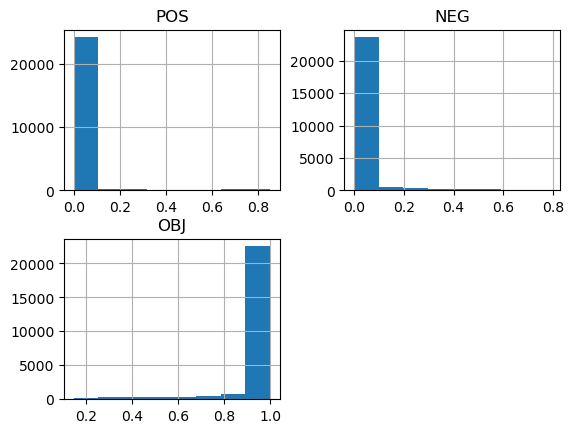

In [15]:
sent_an.hist(bins=8)

<Axes: >

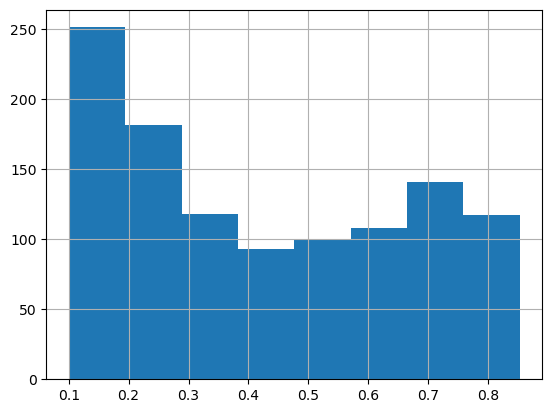

In [16]:
sent_an[sent_an["POS"]>.1]["POS"].hist(bins=8)

<Axes: >

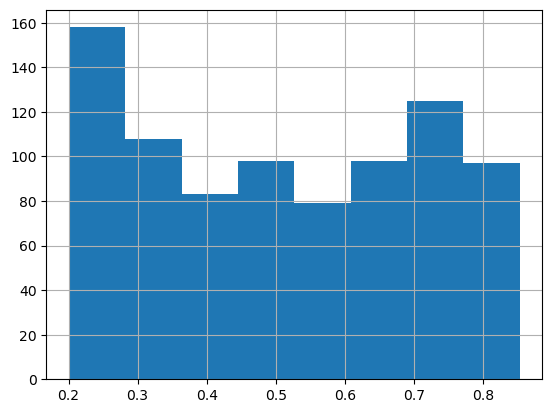

In [17]:
sent_an[sent_an["POS"]>.2]["POS"].hist(bins=8)

<Axes: >

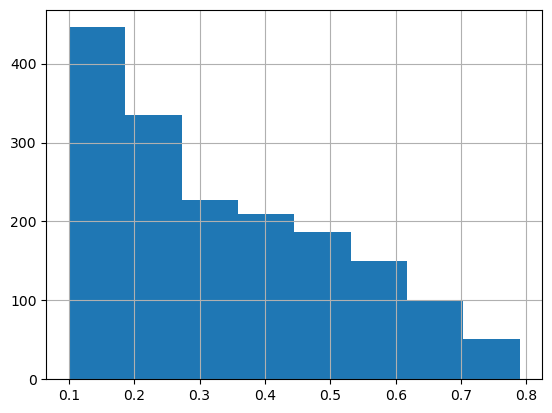

In [18]:
sent_an[sent_an["NEG"]>.1]["NEG"].hist(bins=8)

<Axes: >

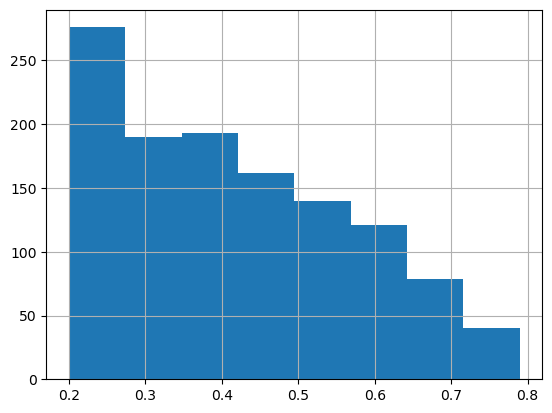

In [19]:
sent_an[sent_an["NEG"]>.2]["NEG"].hist(bins=8)

### Po Vrsti 
a - pridev <br>
v - glagol <br>
n - imenica <br>

In [20]:
sent_an["Vrsta"].value_counts(sort=True)

Vrsta
n    20080
v     2896
a     2202
b      142
Name: count, dtype: int64

<Axes: ylabel='count'>

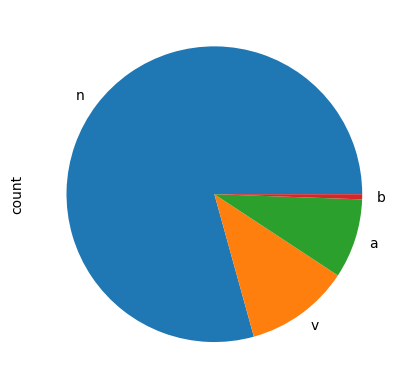

In [21]:
sent_an["Vrsta"].value_counts(sort=True).plot(kind ="pie")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

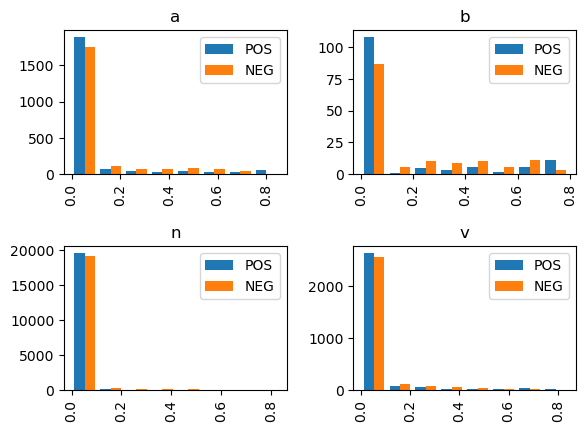

In [22]:
sent_an.hist(bins=8, by="Vrsta", legend =True, column= ["POS", "NEG"] )

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

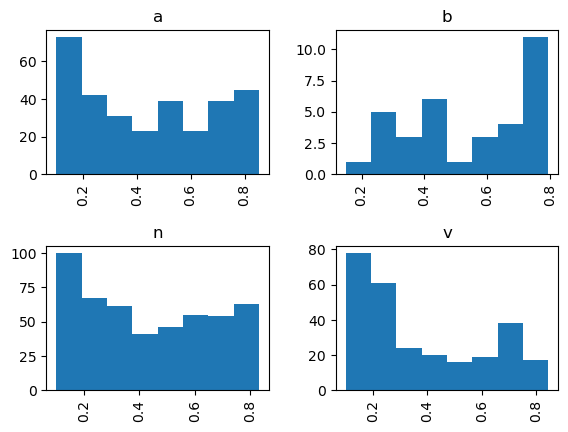

In [23]:
sent_an[sent_an["POS"]>.1].hist(bins=8, by="Vrsta", column="POS")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

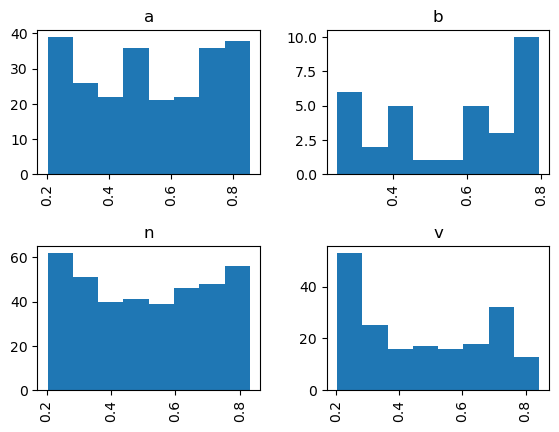

In [24]:
sent_an[sent_an["POS"]>.2].hist(bins=8, by="Vrsta", column="POS")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

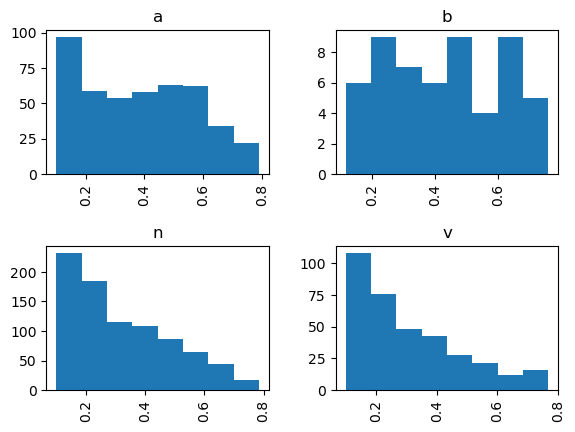

In [25]:
sent_an[sent_an["NEG"]>.1].hist(bins=8, by="Vrsta", column="NEG")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

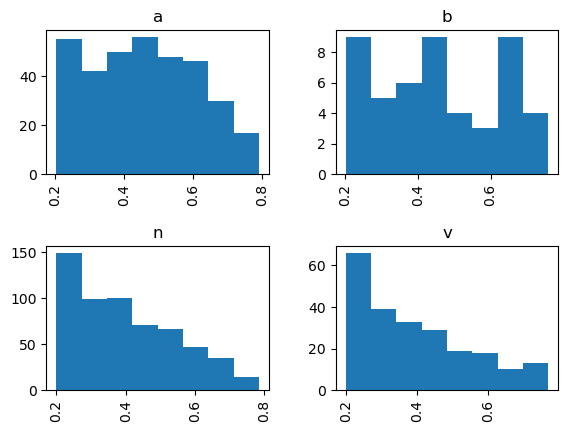

In [26]:
sent_an[sent_an["NEG"]>.2].hist(bins=8, by="Vrsta", column="NEG")

Ovde se prikazuje raspored vresnosti u odnsu na oba polariteta, ali bez vrednosti (0,0) zbog preglednosti

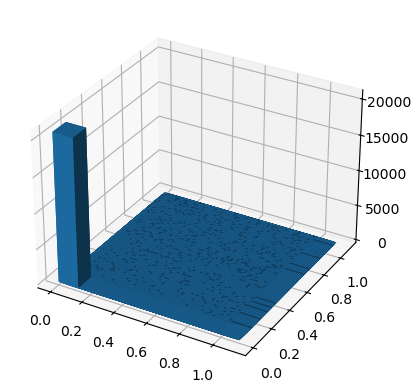

In [27]:
import numpy as np
import matplotlib.pyplot as plt

sent_bez0 = sent_an[np.logical_xor(((sent_an["POS"] ==0) & (sent_an["NEG"] == 0)), 1)]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = sent_bez0["POS"], sent_bez0["NEG"]
hist, xedges, yedges = np.histogram2d(x, y, bins=64, range=[[0, 1], [0, 1]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] , yedges[:-1] , indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 64 bars.
dx = dy = 0.125 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

<Axes: ylabel='count'>

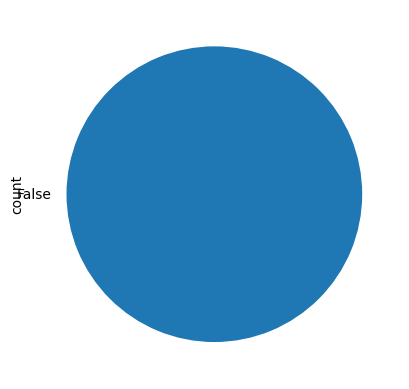

In [28]:
((sent_an["POS"] ==0) & (sent_an["NEG"] == 0)).value_counts(sort=True).plot(kind ="pie")

In [29]:
# srbsentiwordnet2.cvs
# srbsentiwordnet_a2.cvs